# Analysis on IPL deliveries Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

divr_df=pd.read_csv(r'C:\Users\hp\First1\Project\IPL\IPL 2008-2019\deliveries.csv')
divr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [2]:
divr_df.shape

(179078, 21)

In [3]:
divr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
divr_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [5]:
divr_df.shape

(179078, 21)

#### In Depth Analysis of S Dhawan Performance

In [6]:
filt = (divr_df['batsman']=='S Dhawan')
divr_df_dhawan = divr_df[filt]
divr_df_dhawan.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,1,S Dhawan,MC Henriques,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
18,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,5,S Dhawan,MC Henriques,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


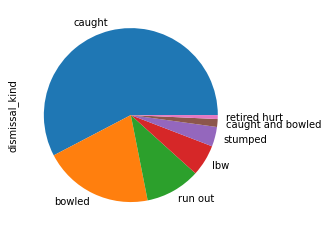

In [7]:
divr_df_dhawan['dismissal_kind'].value_counts().plot.pie()

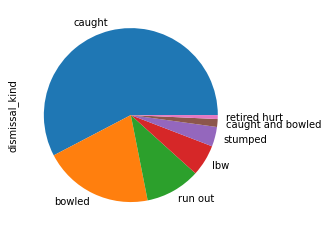

In [8]:
divr_df_dhawan['dismissal_kind'].value_counts().plot.pie()

##### Total runs made by S Dhawan

In [9]:
divr_df_dhawan['total_runs'].sum()

4876

In [10]:
def count(divr_df,runs):
    return len(divr_df_dhawan[divr_df_dhawan['batsman_runs']==runs])*runs  #total runs

In [11]:
# Total ones
count(divr_df_dhawan,1)

1473

In [12]:
# Total twos
count(divr_df_dhawan,2)

410

In [13]:
# Total threes
count(divr_df_dhawan,3)

54

In [14]:
# Total fours
count(divr_df_dhawan,4)

2104

In [15]:
# Total fives
count(divr_df_dhawan,5)

15

In [16]:
# Total sixes
count(divr_df_dhawan,6)

576

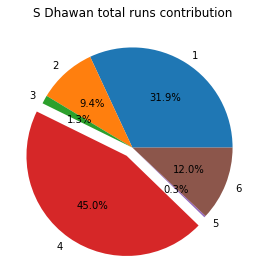

In [17]:
slices=[1137,336,48,1604,10,426]
labels=[1,2,3,4,5,6]
explode=[0,0,0,0.1,0,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("S Dhawan total runs contribution")
plt.tight_layout()
plt.show()

In [18]:
divr_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

##### Replacing the Team Names with their abbreviations

In [19]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
    'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
    'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
    'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
    'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
    'Rising Pune Supergiants':'RPS'
}

In [20]:
divr_df['batting_team']=divr_df['batting_team'].map(Teams)
divr_df['bowling_team']=divr_df['bowling_team'].map(Teams)

In [21]:
divr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
divr_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#### Score Distribution For Teams by Innings

In [23]:
runs=divr_df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)

In [24]:
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1506,2,MI,140
1507,1,SRH,171
1508,2,CSK,162
1509,1,MI,152


In [25]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]
inning1.head()

,inning,batting_team,total_runs
0,1,SRH,207
2,1,MI,184
4,1,GL,183
6,1,RPS,163
8,1,RCB,157


In [26]:
inning2.head()

,inning,batting_team,total_runs
1,2,RCB,172
3,2,RPS,187
5,2,KKR,184
7,2,KXIP,164
9,2,DD,142


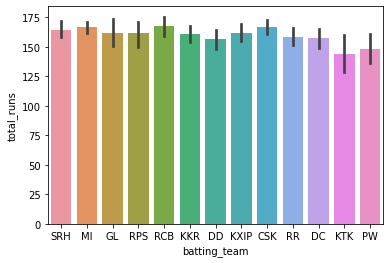

In [27]:
#In inning 1
sns.barplot(x='batting_team',y='total_runs',data=inning1)

##### According to this plot, the batting by CSK & RCB seems best. 

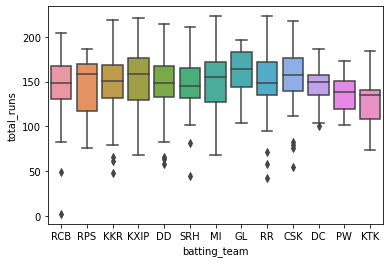

In [28]:
#In inning 2
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

#### In this, we see a point near 0 for RCB which may seem to be outlier. But it is on account of the match was disrupted.

##### Total Scores of matches

In [29]:
high_scores=divr_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores.head()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183


##### How many times teams scores more than 200

In [30]:
score_200=high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1455,11326,2,KKR,RCB,219
1464,11333,1,RCB,KXIP,213
1472,11338,1,KKR,MI,241
1473,11338,2,MI,KKR,204


In 104 matches out of 642 the score goes more than 200

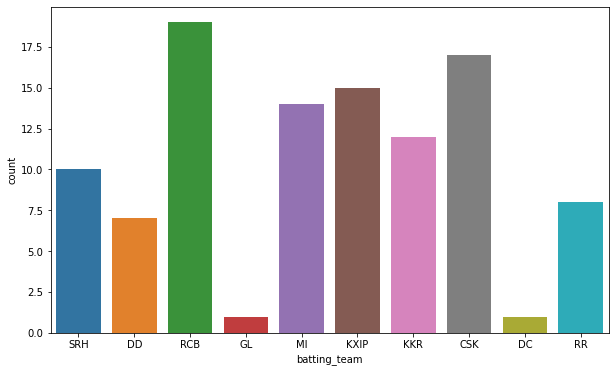

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(score_200['batting_team'])

#### Graph shows the number of times a team has scored above 200 runs. 

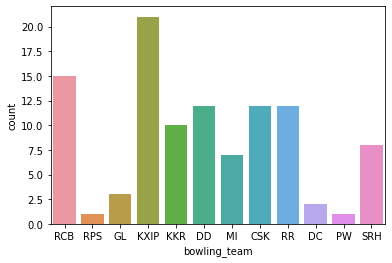

In [32]:
sns.countplot(score_200['bowling_team'])

##### Graph shows the number of times a bowling team has scored above 200 runs.

##### How many times team scores >200 runs against batting team

In [33]:
high_200 = divr_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['match_id'],inplace=True)

In [34]:
high_200['total_runs'].max()

263

In [35]:
high_200.head()

,inning,batting_team,bowling_team,total_runs
match_id,,,,
1,1,SRH,RCB,207
1,2,RCB,SRH,172
2,1,MI,RPS,184
2,2,RPS,MI,187
3,1,GL,KKR,183


##### Batsman Comparison

In [36]:
balls=divr_df.groupby(['batsman'])['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [37]:
total_runs=divr_df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
total_runs.columns=['batsman','runs']
total_runs

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [38]:
four=divr_df[divr_df['batsman_runs']==4]

In [39]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
...,...,...
405,YK Pathan,264
406,YV Takawale,26
407,Yashpal Singh,5
408,Yuvraj Singh,218


In [40]:
sixes=divr_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
sixes.columns=['batsman','6s']
sixes

,batsman,6s
0,A Ashish Reddy,15
1,A Chandila,0
2,A Chopra,0
3,A Choudhary,1
4,A Dananjaya,0
...,...,...
511,YV Takawale,3
512,Yashpal Singh,0
513,Younis Khan,0
514,Yuvraj Singh,149


In [42]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],sixes.iloc[:,1]],axis=1)
player

,inning,batting_team,total_runs,ball,4s,6s
0,1,SRH,207,196.0,16.0,15.0
1,2,RCB,172,7.0,7.0,0.0
2,1,MI,184,75.0,1.0,0.0
3,2,RPS,187,20.0,5.0,1.0
4,1,GL,183,5.0,13.0,0.0
...,...,...,...,...,...,...
1506,2,MI,140,NaN,NaN,NaN
1507,1,SRH,171,NaN,NaN,NaN
1508,2,CSK,162,NaN,NaN,NaN
1509,1,MI,152,NaN,NaN,NaN


In [43]:
player['strike_rate']=player['total_runs']/player['ball']
player.head()

,inning,batting_team,total_runs,ball,4s,6s,strike_rate
0,1,SRH,207,196.0,16.0,15.0,1.056122
1,2,RCB,172,7.0,7.0,0.0,24.571429
2,1,MI,184,75.0,1.0,0.0,2.453333
3,2,RPS,187,20.0,5.0,1.0,9.350000
4,1,GL,183,5.0,13.0,0.0,36.600000


In [44]:
player.isna().sum()

inning             0
batting_team       0
total_runs         0
ball             995
4s              1101
6s               995
strike_rate      995
dtype: int64

In [45]:
player.fillna(0,inplace=True)

In [46]:
player

,inning,batting_team,total_runs,ball,4s,6s,strike_rate
0,1,SRH,207,196.0,16.0,15.0,1.056122
1,2,RCB,172,7.0,7.0,0.0,24.571429
2,1,MI,184,75.0,1.0,0.0,2.453333
3,2,RPS,187,20.0,5.0,1.0,9.350000
4,1,GL,183,5.0,13.0,0.0,36.600000
...,...,...,...,...,...,...,...
1506,2,MI,140,0.0,0.0,0.0,0.000000
1507,1,SRH,171,0.0,0.0,0.0,0.000000
1508,2,CSK,162,0.0,0.0,0.0,0.000000
1509,1,MI,152,0.0,0.0,0.0,0.000000


In [47]:
player.isnull().values.any()

False

In [48]:
grp=divr_df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
11158,11415,RD Chahar,MI,0
11159,11415,RG Sharma,MI,15
11160,11415,SK Raina,CSK,9
11161,11415,SN Thakur,CSK,2


In [49]:
max=grp.groupby(['batsman'])['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Dananjaya,4
...,...,...
505,YV Takawale,45
506,Yashpal Singh,20
507,Younis Khan,3
508,Yuvraj Singh,83


In [50]:
player2=pd.concat([player,max.iloc[:,1:3]],axis=1)
player2

,inning,batting_team,total_runs,ball,4s,6s,strike_rate,max_runs
0,1,SRH,207,196.0,16.0,15.0,1.056122,36.0
1,2,RCB,172,7.0,7.0,0.0,24.571429,4.0
2,1,MI,184,75.0,1.0,0.0,2.453333,24.0
3,2,RPS,187,20.0,5.0,1.0,9.350000,15.0
4,1,GL,183,5.0,13.0,0.0,36.600000,4.0
...,...,...,...,...,...,...,...,...
1506,2,MI,140,0.0,0.0,0.0,0.000000,NaN
1507,1,SRH,171,0.0,0.0,0.0,0.000000,NaN
1508,2,CSK,162,0.0,0.0,0.0,0.000000,NaN
1509,1,MI,152,0.0,0.0,0.0,0.000000,NaN


#### Top 10 Batsman

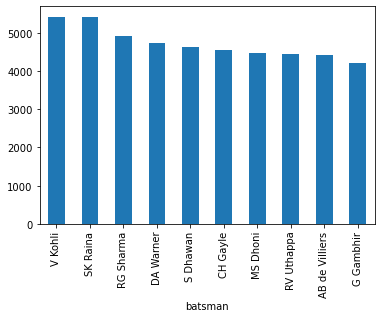

In [51]:
max_runs=divr_df.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.bar()

#### Virat Kohli has highest total runs across all seasons Whereas  SK Raina just few runs behind with the second spot 

#### Top Individual Scores

In [52]:
divr_df.groupby(["match_id","batsman",'batting_team'])["batsman_runs"].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


#### Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

##### Highest Wicket Taker

In [53]:
divr_df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [54]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [55]:
hwt=divr_df[divr_df["dismissal_kind"].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


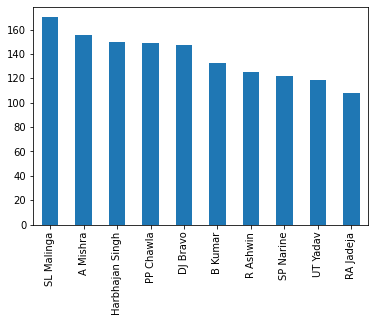

In [56]:
hwt['bowler'].value_counts()[:10].plot.bar()

##### SL Malinga leads the chart, 